<a href="https://colab.research.google.com/github/zhuan0122/Machine_Learing_Handson_Python_in_Data_science/blob/master/PCA_principal_component_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Applying PCA

In [ ]:
from sklearn.decomposition import PCA
# we ususally first try reduced dimension to be 2 and see the model performance. since if it is good with 2 then we also 
# can plot it as 2D. if it is not working good with dimension 2 then we could increase it a little bit
pca = PCA(n_components = 2) # pca is the object of PCA class
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


0.9722222222222222

In [ ]:
print(X_train) # has been reduced to be 2 dimensional matrix 

[[-2.17884511e+00 -1.07218467e+00]
 [-1.80819239e+00  1.57822344e+00]
 [ 1.09829474e+00  2.22124345e+00]
 [-2.55584748e+00 -1.66210369e+00]
 [ 1.85698063e+00  2.41573166e-01]
 [ 2.58288576e+00 -1.37668170e+00]
 [ 8.72876119e-01  2.25618512e+00]
 [-4.18384029e-01  2.35415681e+00]
 [-3.04977245e-01  2.27659433e+00]
 [ 2.14082532e+00 -1.10052871e+00]
 [-2.98136465e+00 -2.47159183e-01]
 [ 1.96188242e+00  1.25407738e+00]
 [-2.16177795e+00 -9.75966550e-01]
 [ 2.21976084e+00 -2.39507167e+00]
 [-2.30179529e+00 -2.05791962e-01]
 [-3.00953827e+00 -2.79141212e-01]
 [ 2.63443473e+00 -8.68313119e-01]
 [-1.09219965e+00 -3.53906625e+00]
 [ 2.62578435e+00 -2.96852840e-03]
 [ 1.98077342e-01  2.29193443e+00]
 [-2.67442753e+00 -2.58800132e+00]
 [-2.54763698e+00 -4.52703891e-01]
 [ 1.77416736e+00  8.43586940e-01]
 [-2.77786938e+00 -4.32090258e-01]
 [-2.86679938e+00 -1.87580875e+00]
 [ 1.35498845e+00  3.99545184e-02]
 [-2.43900474e+00  9.44074889e-02]
 [-2.27268121e+00  5.05883053e-01]
 [ 1.17887166e+00  2

In [ ]:
print(y_train)

[3 2 2 3 1 1 2 2 2 1 3 2 3 1 3 3 1 3 1 2 3 3 2 3 3 1 2 3 2 2 3 2 1 2 2 2 1
 1 2 2 3 3 2 2 2 3 3 1 3 2 2 2 2 2 1 1 2 1 3 1 3 1 1 2 1 2 2 1 3 2 1 2 2 2
 3 1 3 3 1 1 2 3 1 1 2 2 1 1 1 3 2 1 2 3 1 2 3 3 1 1 3 1 3 2 1 1 2 1 3 2 3
 1 3 3 3 1 2 2 2 2 3 3 2 2 1 2 3 3 1 1 3 2 2 2 1 1 1 2 2 2 1 3]


## Visualising the Training set results

In [ ]:
# we want to visulize the result as a colored map: 
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1 ,X2 = np.meshgrid()

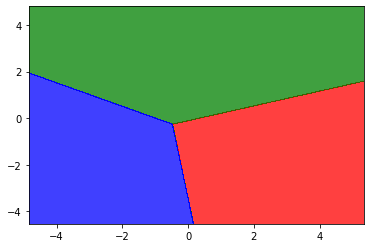

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
#X1 is the axis of feature 1 from x_train,X2 is the axis of feature2 of X_train, after applying meshgrid, X1,X2 becomes 2 dimensinonal data
# set.
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# predict with new two PCA features, each wine has two features. 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


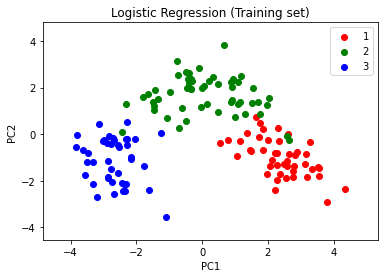

In [ ]:
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


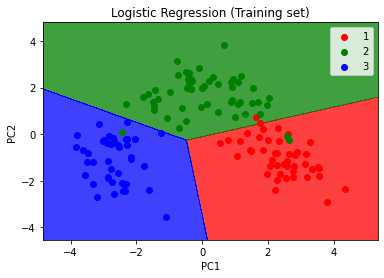

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
#X1 is the axis of feature 1 from x_train,X2 is the axis of feature2 of X_train, after applying meshgrid, X1,X2 becomes 2 dimensinonal data
# set.
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# predict with new two PCA features, each wine has two features. 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [33]:
np.unique(y_set)

array([1, 2, 3])

In [ ]:
X2.shape

(804, 982)

In [ ]:
print(X1)
X1.shape

[[-5.1975958 -5.1875958 -5.1775958 ...  4.5924042  4.6024042  4.6124042]
 [-5.1975958 -5.1875958 -5.1775958 ...  4.5924042  4.6024042  4.6124042]
 [-5.1975958 -5.1875958 -5.1775958 ...  4.5924042  4.6024042  4.6124042]
 ...
 [-5.1975958 -5.1875958 -5.1775958 ...  4.5924042  4.6024042  4.6124042]
 [-5.1975958 -5.1875958 -5.1775958 ...  4.5924042  4.6024042  4.6124042]
 [-5.1975958 -5.1875958 -5.1775958 ...  4.5924042  4.6024042  4.6124042]]


(804, 982)

In [ ]:
np.arange(0,5,1)

array([0, 1, 2, 3, 4])

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


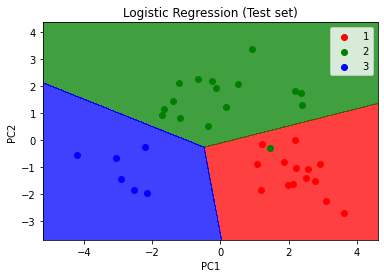

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()